In [ ]:
!pip install emnist


In [ ]:
!pip install deeplake



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-datasets numpy scikit-learn


testing and training the EMNIST dataset using ADAM optimizer and RELU activation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Download and Transform EMNIST Dataset
def get_emnist_dataset():
    transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)
    return train_dataset, test_dataset

# Neural Network Model
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, output_size=27):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return self.softmax(x)

# Training Function
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            labels = labels - 1  # Adjust labels to match 0-25 classes
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Testing Function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Main Code
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_dataset, test_dataset = get_emnist_dataset()
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = FeedForwardNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print("Training the Model...")
    train(model, train_loader, criterion, optimizer, epochs=3)

    print("Testing the Model...")
    test(model, test_loader)


Training the Model...
Epoch 1/3, Loss: 0.8075982685119678
Epoch 2/3, Loss: 0.4089112797837991
Epoch 3/3, Loss: 0.332678106381343
Testing the Model...
Accuracy: 88.83%


SIGMOID and SGD EMNIST

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Download and Transform EMNIST Dataset
def get_emnist_dataset():
    transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)
    return train_dataset, test_dataset

# Neural Network Model
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, output_size=27):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()  # Sigmoid Activation
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        return self.softmax(x)

# Training Function
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            labels = labels - 1  # Adjust labels to match 0-25 classes
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Testing Function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Main Code
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_dataset, test_dataset = get_emnist_dataset()
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = FeedForwardNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Using SGD Optimizer with Momentum

    print("Training the Model...")
    train(model, train_loader, criterion, optimizer, epochs=10)

    print("Testing the Model...")
    test(model, test_loader)


Training the Model...
Epoch 1/10, Loss: 2.9219905871000047
Epoch 2/10, Loss: 1.641696192759734
Epoch 3/10, Loss: 1.230760641770485
Epoch 4/10, Loss: 1.0051345963355822
Epoch 5/10, Loss: 0.8443362545508605
Epoch 6/10, Loss: 0.7222445112161148
Epoch 7/10, Loss: 0.6339283427825341
Epoch 8/10, Loss: 0.5697184804998912
Epoch 9/10, Loss: 0.5211883170788105
Epoch 10/10, Loss: 0.48327592929204305
Testing the Model...
Accuracy: 85.12%


RELU and RMSProp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Download and Transform EMNIST Dataset
def get_emnist_dataset():
    transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)
    return train_dataset, test_dataset

# Neural Network Model
class FeedForwardNN(nn.Module):
    def __init__(self, input_size=28*28, hidden_size=128, output_size=27):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.leaky_relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.elu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.leaky_relu(x)
        x = self.fc2(x)
        x = self.elu(x)
        x = self.fc3(x)
        return self.softmax(x)

# Training Function
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            labels = labels - 1  # Adjust labels to match 0-25 classes
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Testing Function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Main Code
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_dataset, test_dataset = get_emnist_dataset()
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = FeedForwardNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(model.parameters(), lr=0.001)  # Using RMSprop Optimizer

    print("Training the Model...")
    train(model, train_loader, criterion, optimizer, epochs=4)

    print("Testing the Model...")
    test(model, test_loader)


Training the Model...
Epoch 1/4, Loss: 0.7123774152535659
Epoch 2/4, Loss: 0.3880888197131646
Epoch 3/4, Loss: 0.31812156105652833
Epoch 4/4, Loss: 0.2811712849369416
Testing the Model...
Accuracy: 89.80%


MGD

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.ReLU()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Momentum Gradient Descent (MGD) Optimizer

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 1.0835
Epoch 2/5, Loss: 0.4725
Epoch 3/5, Loss: 0.3734
Epoch 4/5, Loss: 0.3252
Epoch 5/5, Loss: 0.2941
Evaluating Model...
Test Accuracy: 89.55%


SGD

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)  #SGD

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 2.6290
Epoch 2/5, Loss: 1.3809
Epoch 3/5, Loss: 1.1270
Epoch 4/5, Loss: 0.9882
Epoch 5/5, Loss: 0.8776
Evaluating Model...
Test Accuracy: 76.46%


NGD

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # NGD approximation using Adam

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 0.7440
Epoch 2/5, Loss: 0.3828
Epoch 3/5, Loss: 0.3134
Epoch 4/5, Loss: 0.2767
Epoch 5/5, Loss: 0.2506
Evaluating Model...
Test Accuracy: 89.41%


L2 regularization


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # NGD approximation using Adam with L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=10)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/10, Loss: 1.0424
Epoch 2/10, Loss: 0.7705
Epoch 3/10, Loss: 0.7397
Epoch 4/10, Loss: 0.7291
Epoch 5/10, Loss: 0.7240
Epoch 6/10, Loss: 0.7186
Epoch 7/10, Loss: 0.7162
Epoch 8/10, Loss: 0.7154
Epoch 9/10, Loss: 0.7132
Epoch 10/10, Loss: 0.7121
Evaluating Model...
Test Accuracy: 80.09%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=32, shuffle=True)  # Changed batch size
    test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # NGD approximation using Adam with L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=10)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)

    print("Training Data Samples:")
    for images, labels in train_loader:
        print(f"Image Batch Shape: {images.shape}")
        print(f"Label Batch: {labels}")
        break


Starting Training...
Epoch 1/10, Loss: 0.9890
Epoch 2/10, Loss: 0.7739
Epoch 3/10, Loss: 0.7530
Epoch 4/10, Loss: 0.7460
Epoch 5/10, Loss: 0.7409
Epoch 6/10, Loss: 0.7395
Epoch 7/10, Loss: 0.7361
Epoch 8/10, Loss: 0.7355
Epoch 9/10, Loss: 0.7345
Epoch 10/10, Loss: 0.7335
Evaluating Model...
Test Accuracy: 79.86%
Training Data Samples:
Image Batch Shape: torch.Size([32, 1, 28, 28])
Label Batch: tensor([ 9, 19,  4, 22,  2, 25, 13, 26,  8,  4, 25,  9,  7,  3,  5, 25, 19, 25,
        25,  2, 21, 16, 15, 18,  4,  7, 25,  6,  1,  2,  1, 19])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=128, shuffle=True)  # Changed batch size
    test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # NGD approximation using Adam with L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=3)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)

    print("Training Data Samples:")
    for images, labels in train_loader:
        print(f"Image Batch Shape: {images.shape}")
        print(f"Label Batch: {labels}")
        break


Starting Training...
Epoch 1/3, Loss: 1.1332
Epoch 2/3, Loss: 0.7804
Epoch 3/3, Loss: 0.7358
Evaluating Model...
Test Accuracy: 80.89%
Training Data Samples:
Image Batch Shape: torch.Size([128, 1, 28, 28])
Label Batch: tensor([25, 24, 10, 22,  6, 11, 21,  3, 15, 21, 13, 18, 12,  1, 12, 11, 12,  1,
        17, 15, 24, 23, 20,  5, 12,  4,  2,  5, 11, 10, 24, 11, 17, 26, 25, 24,
        15, 12, 10, 14, 11, 21,  2,  6, 13, 23,  5, 13,  7, 12,  4, 17, 15, 12,
        10,  9, 16, 18, 24,  5, 10, 26, 23, 14, 12, 22,  6, 10, 20,  5,  5,  3,
        25, 20, 22, 17, 17, 16,  4,  1,  4, 16, 22, 17, 26, 26, 14, 12, 22, 23,
         9,  1, 17, 23, 13,  3, 18, 21, 17, 11, 23, 20,  7, 13,  3,  9, 24, 15,
        15,  1, 10, 13, 13, 13, 17, 26, 17,  7,  5, 23,  1, 11,  4, 18, 11, 25,
         6, 12])


TRAINING ACCURACY CALCULATON

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.011)  # NGD approximation using Adam

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 0.8554
Epoch 2/5, Loss: 0.7933
Epoch 3/5, Loss: 0.7660
Epoch 4/5, Loss: 0.7876
Epoch 5/5, Loss: 0.7824
Evaluating Model...
Test Accuracy: 75.81%


1 HIDDEN LAYER  MULTIPLE PERCEPTRON TESTING

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=32, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # NGD approximation using Adam

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 1.1959
Epoch 2/5, Loss: 0.8181
Epoch 3/5, Loss: 0.7005
Epoch 4/5, Loss: 0.6409
Epoch 5/5, Loss: 0.6039
Evaluating Model...
Test Accuracy: 82.21%


Starting Training...
Epoch 1/5, Loss: 1.0424, Training Accuracy: 71.00%
Epoch 2/5, Loss: 0.7761, Training Accuracy: 78.88%
Epoch 3/5, Loss: 0.7469, Training Accuracy: 79.69%
Epoch 4/5, Loss: 0.7317, Training Accuracy: 80.43%
Epoch 5/5, Loss: 0.7225, Training Accuracy: 80.57%


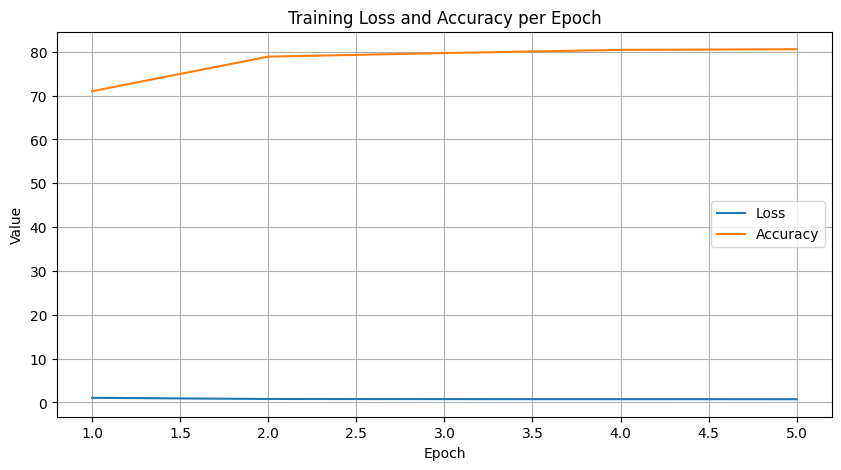

Evaluating Model...
Test Accuracy: 81.07%
Training Data Samples:
Image Batch Shape: torch.Size([64, 1, 28, 28])
Label Batch: tensor([25, 10, 22, 26, 14, 12,  9, 17,  8,  4,  5,  9,  1,  2,  2, 23,  2, 18,
         7,  5,  8,  8, 21,  4,  1, 23, 13, 14,  9,  3,  6, 11,  3, 21, 24, 17,
        18,  1, 13,  8, 26, 19, 15, 18, 18,  5, 26, 16,  7,  2, 14, 10, 22, 12,
        14, 10, 23, 24,  6, 12, 12,  8, 10,  9])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    epoch_losses = []
    epoch_accuracies = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = torch.max(predictions, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        epoch_losses.append(total_loss / len(data_loader))
        epoch_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}, Training Accuracy: {accuracy:.2f}%")

    # Plotting Loss vs Epoch
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), epoch_losses, label="Loss")
    plt.plot(range(1, epochs + 1), epoch_accuracies, label="Accuracy")
    plt.title("Training Loss and Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)  # Changed batch size
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # NGD approximation using Adam with L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)

    print("Training Data Samples:")
    for images, labels in train_loader:
        print(f"Image Batch Shape: {images.shape}")
        print(f"Label Batch: {labels}")
        break



CONFUSION MATRIX

Starting Training...
Epoch 1/5, Loss: 1.0425, Training Accuracy: 71.19%
Epoch 2/5, Loss: 0.7715, Training Accuracy: 79.08%
Epoch 3/5, Loss: 0.7408, Training Accuracy: 80.06%
Epoch 4/5, Loss: 0.7309, Training Accuracy: 80.26%
Epoch 5/5, Loss: 0.7249, Training Accuracy: 80.55%
Evaluating Model...
Test Accuracy: 80.64%


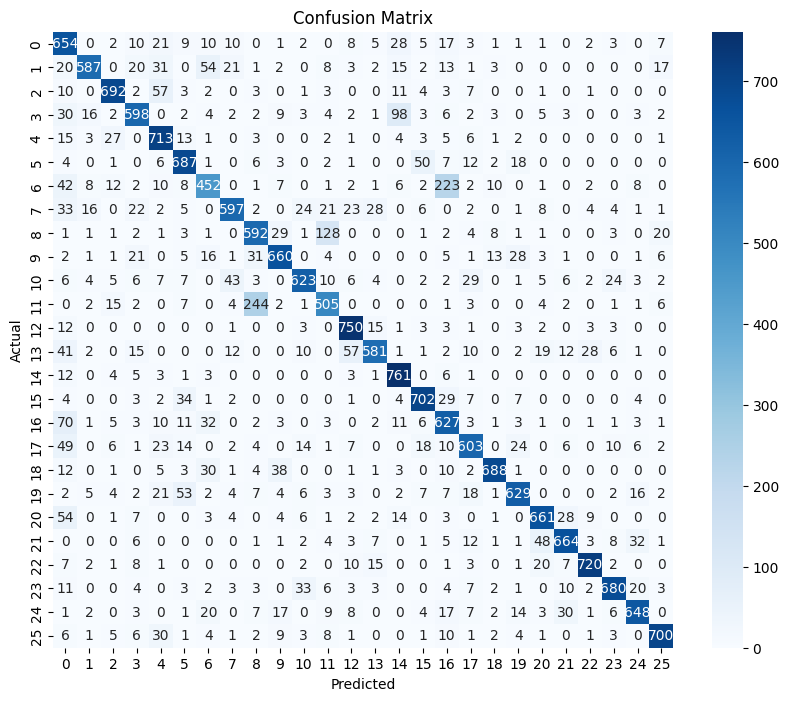

Training Data Samples:
Image Batch Shape: torch.Size([64, 1, 28, 28])
Label Batch: tensor([ 3, 12, 20,  7, 19, 17, 14, 19, 12,  5, 18, 17,  9, 18, 19,  2, 16, 16,
        26,  4,  6, 15,  6, 12, 18, 19,  9, 15,  2, 24,  7,  6, 24, 11, 23, 19,
        26, 18, 10, 26, 20,  8, 18, 26,  2, 10, 20, 20, 25, 23, 20, 20,  3,  3,
         8, 13, 10, 11, 14, 14, 10, 13, 12, 12])


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    epoch_losses = []
    epoch_accuracies = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = torch.max(predictions, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        epoch_losses.append(total_loss / len(data_loader))
        epoch_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}, Training Accuracy: {accuracy:.2f}%")


# Testing Function with Confusion Matrix
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)  # Changed batch size
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # NGD approximation using Adam with L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)

    print("Training Data Samples:")
    for images, labels in train_loader:
        print(f"Image Batch Shape: {images.shape}")
        print(f"Label Batch: {labels}")
        break


CLASSIFICATION REPORT USING XAVIER

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}")

# Testing Function
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.1)  # NGD approximation using Adam

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)


Starting Training...
Epoch 1/5, Loss: 6.2719
Epoch 2/5, Loss: 6.2663
Epoch 3/5, Loss: 6.5438
Epoch 4/5, Loss: 6.2268
Epoch 5/5, Loss: 6.3834
Evaluating Model...
Test Accuracy: 3.85%


Starting Training...
Epoch 1/5, Loss: 1.0926, Training Accuracy: 70.05%
Epoch 2/5, Loss: 0.7946, Training Accuracy: 78.53%
Epoch 3/5, Loss: 0.7480, Training Accuracy: 80.03%
Epoch 4/5, Loss: 0.7263, Training Accuracy: 80.78%
Epoch 5/5, Loss: 0.7131, Training Accuracy: 81.16%


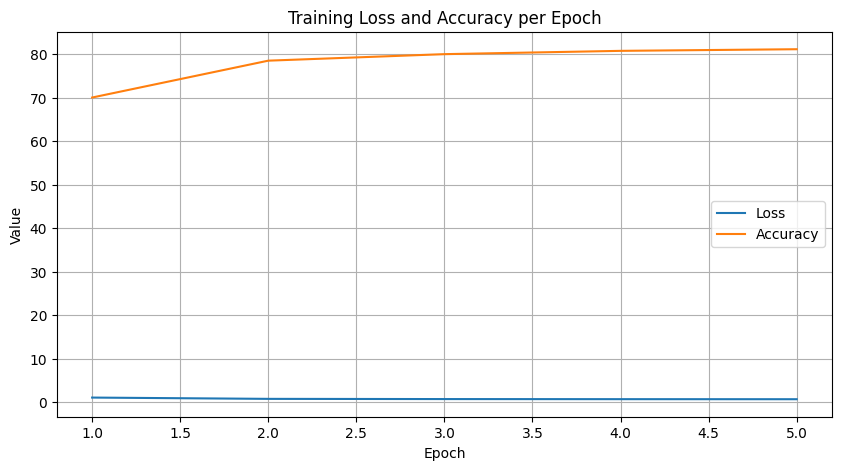

Evaluating Model...
Test Accuracy: 81.28%


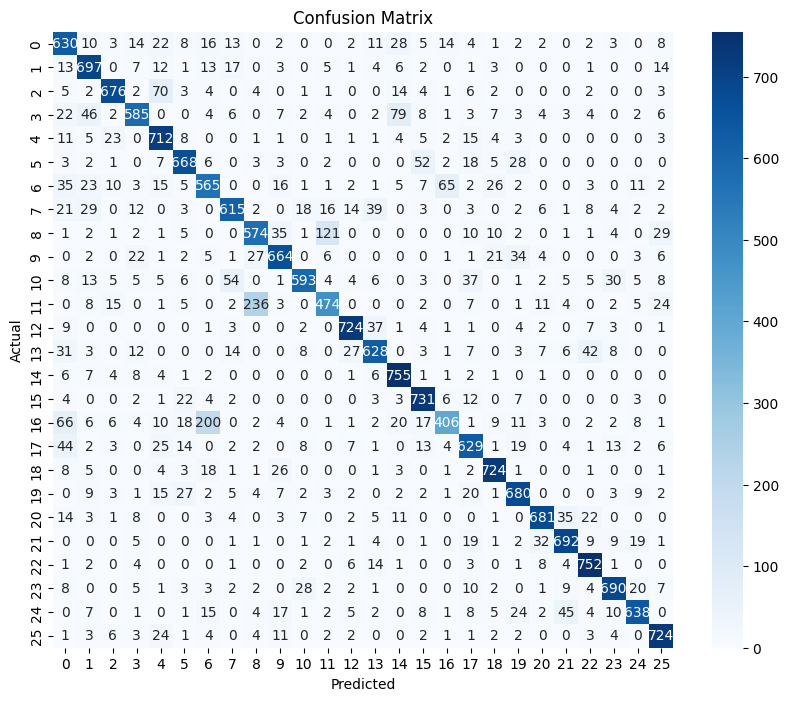

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       800
           1       0.79      0.87      0.83       800
           2       0.89      0.84      0.87       800
           3       0.83      0.73      0.78       800
           4       0.77      0.89      0.82       800
           5       0.83      0.83      0.83       800
           6       0.65      0.71      0.68       800
           7       0.83      0.77      0.80       800
           8       0.66      0.72      0.69       800
           9       0.83      0.83      0.83       800
          10       0.88      0.74      0.80       800
          11       0.73      0.59      0.66       800
          12       0.90      0.91      0.90       800
          13       0.82      0.79      0.80       800
          14       0.81      0.94      0.87       800
          15       0.84      0.91      0.87       800
          16       0.80      0.51      0.62       800
    

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        nn.init.xavier_uniform_(self.layer1.weight)  # Xavier Initialization
        self.activation1 = nn.ReLU()  # ReLU Activation
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        nn.init.xavier_uniform_(self.layer2.weight)  # Xavier Initialization
        self.activation2 = nn.Tanh()  # Tanh Activation
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        nn.init.xavier_uniform_(self.output_layer.weight)  # Xavier Initialization
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs):
    model.train()
    epoch_losses = []
    epoch_accuracies = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            _, predicted = torch.max(predictions, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        epoch_losses.append(total_loss / len(data_loader))
        epoch_accuracies.append(accuracy)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}, Training Accuracy: {accuracy:.2f}%")

    # Plotting Loss vs Epoch
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), epoch_losses, label="Loss")
    plt.plot(range(1, epochs + 1), epoch_accuracies, label="Accuracy")
    plt.title("Training Loss and Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Testing Function with Confusion Matrix and Classification Report
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, zero_division=0))

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    model = NeuralNet().to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.01)  # SGD with momentum and L2 Regularization

    print("Starting Training...")
    train_model(model, train_loader, loss_function, optimizer, epochs=5)

    print("Evaluating Model...")
    evaluate_model(model, test_loader)

    print("Training Data Samples:")
    for images, labels in train_loader:
        print(f"Image Batch Shape: {images.shape}")
        print(f"Label Batch: {labels}")
        break


LOSS AND TRAINING ACCURACY FOR THE ABOVE OPTIMIZERS USED


Training with SGD optimizer...
[SGD] Epoch 1/5, Loss: 3.4344, Training Accuracy: 3.88%
[SGD] Epoch 2/5, Loss: 3.2612, Training Accuracy: 3.77%
[SGD] Epoch 3/5, Loss: 3.2601, Training Accuracy: 3.84%
[SGD] Epoch 4/5, Loss: 3.2597, Training Accuracy: 3.81%
[SGD] Epoch 5/5, Loss: 3.2596, Training Accuracy: 3.82%

Evaluating model trained with SGD...
[SGD] Test Accuracy: 3.85%

Training with MGD optimizer...
[MGD] Epoch 1/5, Loss: 3.3269, Training Accuracy: 3.80%
[MGD] Epoch 2/5, Loss: 3.3083, Training Accuracy: 3.88%
[MGD] Epoch 3/5, Loss: 3.3085, Training Accuracy: 3.82%
[MGD] Epoch 4/5, Loss: 3.3082, Training Accuracy: 3.84%
[MGD] Epoch 5/5, Loss: 3.3078, Training Accuracy: 3.86%

Evaluating model trained with MGD...
[MGD] Test Accuracy: 3.85%

Training with NGD optimizer...
[NGD] Epoch 1/5, Loss: 3.3317, Training Accuracy: 3.75%
[NGD] Epoch 2/5, Loss: 3.2768, Training Accuracy: 3.87%
[NGD] Epoch 3/5, Loss: 3.2772, Training Accuracy: 3.96%
[NGD] Epoch 4/5, Loss: 3.2773, Training Accura

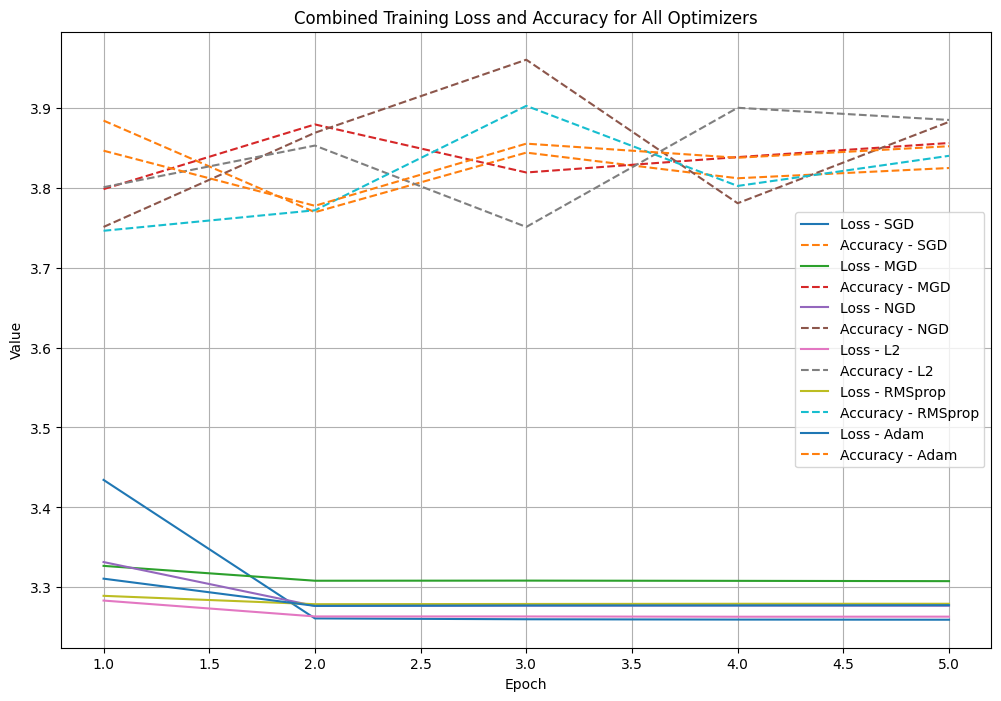

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

# Dataset Preparation
def load_emnist_data():
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
    train_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=data_transform)
    test_set = torchvision.datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=data_transform)
    return train_set, test_set

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, output_dim=27):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        nn.init.uniform_(self.layer1.weight)  # Random Initialization
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        nn.init.uniform_(self.layer2.weight)
        self.activation2 = nn.Tanh()
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        nn.init.uniform_(self.output_layer.weight)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.softmax(self.output_layer(x))
        return x

# Create directory for outputs
if not os.path.exists("outputs"):
    os.makedirs("outputs")

# Combined Plot Data
all_losses = {}
all_accuracies = {}

# Training Function
def train_model(model, data_loader, loss_fn, optimizer, epochs, optimizer_name):
    model.train()
    epoch_losses = []
    epoch_accuracies = []
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            predictions = model(images)
            loss = loss_fn(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(predictions, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        epoch_losses.append(total_loss / len(data_loader))
        epoch_accuracies.append(accuracy)
        print(f"[{optimizer_name}] Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.4f}, Training Accuracy: {accuracy:.2f}%")

    all_losses[optimizer_name] = epoch_losses
    all_accuracies[optimizer_name] = epoch_accuracies

# Testing Function with Confusion Matrix and Classification Report
def evaluate_model(model, data_loader, optimizer_name):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels - 1
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    print(f"[{optimizer_name}] Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_set, test_set = load_emnist_data()
    train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

    optimizers = {
        "SGD": optim.SGD,
        "MGD": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
        "NGD": optim.Adam,
        "L2": lambda params: optim.SGD(params, lr=0.01, weight_decay=0.01),
        "RMSprop": optim.RMSprop,
        "Adam": optim.Adam
    }

    for opt_name, opt_class in optimizers.items():
        print(f"\nTraining with {opt_name} optimizer...")
        model = NeuralNet().to(device)
        loss_function = nn.CrossEntropyLoss()
        optimizer = opt_class(model.parameters(), lr=0.001) if opt_name not in ["SGD", "MGD", "L2"] else opt_class(model.parameters())

        train_model(model, train_loader, loss_function, optimizer, epochs=5, optimizer_name=opt_name)
        print(f"\nEvaluating model trained with {opt_name}...")
        evaluate_model(model, test_loader, optimizer_name=opt_name)

    # Combined Plot for all Optimizers
    plt.figure(figsize=(12, 8))
    for opt_name in all_losses:
        plt.plot(range(1, 6), all_losses[opt_name], label=f"Loss - {opt_name}")
        plt.plot(range(1, 6), all_accuracies[opt_name], linestyle='dashed', label=f"Accuracy - {opt_name}")
    plt.title("Combined Training Loss and Accuracy for All Optimizers")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.savefig("outputs/Combined_Training_Loss_Accuracy.png")
    plt.show()
